# Feature Engineering Techniques

Shoutout to Greg Hogg for his great video on youtube

https://www.youtube.com/watch?v=GduT2ZCc26E&t=40s


## Downloading the dataset

In [100]:
# download the dataset either using your kaggle API
#!kaggle datasets download -d camnugent/california-housing-prices
#!unzip california-housing-prices.zip

# OR manually from this link
# https://www.kaggle.com/datasets/camnugent/california-housing-prices


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [102]:
df = pd.read_csv('housing.csv')

# immediately drop null values
df.dropna(inplace=True)

df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [103]:
# train test split the dataframe
df = df.sample(frac=1, random_state=23)
train_size = int(len(df) * 0.8)

train_df = df[:train_size]

test_df = df[train_size:]

train_df.reset_index(drop=True, inplace=True)
train_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.89,36.73,43.0,524.0,93.0,302.0,93.0,2.6146,81300.0,INLAND
1,-117.25,34.13,37.0,2498.0,472.0,1291.0,487.0,3.0000,83400.0,INLAND
2,-117.10,32.68,49.0,1412.0,350.0,1200.0,332.0,2.0398,93600.0,NEAR OCEAN
3,-121.96,37.34,36.0,844.0,153.0,373.0,160.0,5.7910,254100.0,<1H OCEAN
4,-121.24,36.34,33.0,1691.0,308.0,792.0,262.0,2.6648,164600.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
16341,-121.42,38.54,29.0,2358.0,493.0,1071.0,470.0,2.9250,94300.0,INLAND
16342,-117.73,34.05,36.0,975.0,243.0,809.0,233.0,2.8929,118100.0,INLAND
16343,-116.31,34.13,20.0,2352.0,556.0,1217.0,481.0,1.6063,55400.0,INLAND
16344,-119.80,36.75,41.0,1659.0,466.0,1391.0,447.0,1.3527,61200.0,INLAND


In [104]:
y_train = train_df['median_house_value'].to_numpy()
y_test = test_df['median_house_value'].to_numpy()

y_train.shape, y_test.shape


((16346,), (4087,))

### Baseline MAE

In [105]:
from sklearn.metrics import mean_absolute_error

# a baseline prediction using the average price for all samples
avg_median_house_val = y_train.mean()
baseline_predictions = np.full(y_test.shape, fill_value=avg_median_house_val)

mean_absolute_error(baseline_predictions, y_test)


91817.08456221559

### 1. PCA (Linear Dimension Reduction)

In [106]:
train_df[['total_rooms', 'total_bedrooms', 'households']].corr()


,total_rooms,total_bedrooms,households
total_rooms,1.000000,0.930416,0.919786
total_bedrooms,0.930416,1.000000,0.980438
households,0.919786,0.980438,1.000000


In [107]:
# test a model with these 3 features before applying PCA

X_train_rooms = train_df[['total_rooms', 'total_bedrooms', 'households']].to_numpy()


X_test_rooms = test_df[['total_rooms', 'total_bedrooms', 'households']].to_numpy()

X_train_rooms.shape, X_test_rooms.shape


((16346, 3), (4087, 3))

In [108]:
from sklearn.ensemble import RandomForestRegressor

forest_basemodel = RandomForestRegressor(n_estimators=50, max_depth=5, n_jobs=-1)
forest_basemodel.fit(X_train_rooms, y_train)


forest_basemodel_preds = forest_basemodel.predict(X_test_rooms)

# before PCA
mean_absolute_error(forest_basemodel_preds, y_test)


81331.08735788678

In [109]:
# now let's test again after pca
from sklearn.decomposition import PCA

# n_components is the number of output features
# we will basically feed in 3 features and get 2 instead
pca = PCA(n_components=2)

pca.fit(X_train_rooms)

X_train_pca = pca.transform(X_train_rooms)
X_test_pca = pca.transform(X_test_rooms)

X_train_pca.shape, X_test_pca.shape


((16346, 2), (4087, 2))

In [110]:
# check the error after appling pca
forest_pca = RandomForestRegressor(n_estimators=50, max_depth=5)
forest_pca.fit(X_train_pca, y_train)

forest_pca_preds = forest_pca.predict(X_test_pca)

mean_absolute_error(forest_pca_preds, y_test)


79266.9896889293

### 2. Preprocessing (normalization and standardization)

#### 1. StandardScaler
the StandardScaler somehow makes all the features equally important

basically it calculates the mean of a column(feature) and the standard deviation of the column
then for each element in the column, subtracts mean and then divides by std

[[ 524.   93.   93.]
 [2498.  472.  487.]
 [1412.  350.  332.]
 ...
 [2352.  556.  481.]
 [1659.  466.  447.]
 [2987.  578.  585.]]

[[-0.9651012  -1.05099499 -1.05626235]
 [-0.06044737 -0.15274427 -0.02934337]
 [-0.55814446 -0.44189094 -0.43333434]
 ...
 [-0.12735692  0.04634032 -0.04498173]
 [-0.44494816 -0.1669646  -0.13359911]
 [ 0.16365381  0.09848153  0.22608318]]


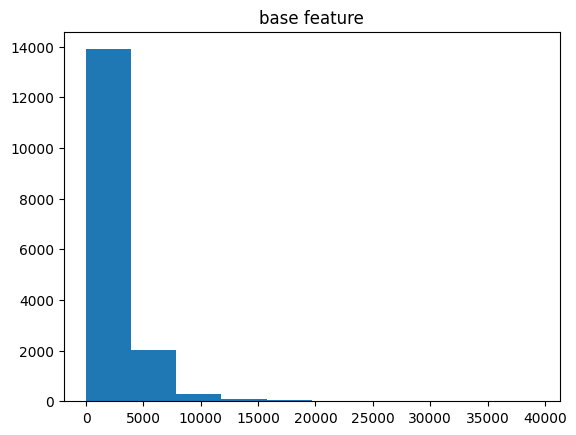

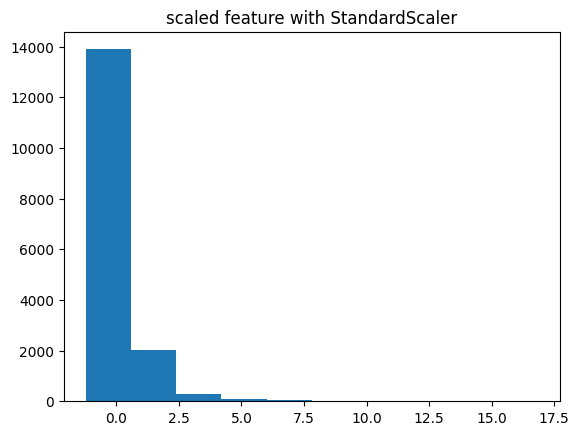

In [111]:
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler

scaler = StandardScaler().fit(X_train_rooms)
X_train_rooms_scaled = scaler.transform(X_train_rooms)
print(
	X_train_rooms,
	X_train_rooms_scaled,
	sep='\n\n'
)

plt.title('base feature')
plt.hist(X_train_rooms[:, 0])
plt.figure()
plt.title('scaled feature with StandardScaler')
plt.hist(X_train_rooms_scaled[:, 0])
plt.show()


#### 2. Normalizer

puts all the values between 0 and 1.

[[ 524.   93.   93.]
 [2498.  472.  487.]
 [1412.  350.  332.]
 ...
 [2352.  556.  481.]
 [1659.  466.  447.]
 [2987.  578.  585.]]

[[0.96991479 0.17214137 0.17214137]
 [0.96506469 0.18235009 0.18814512]
 [0.94629483 0.23456317 0.22249992]
 ...
 [0.9544586  0.22562882 0.19519328]
 [0.93189807 0.26176281 0.25109008]
 [0.96412653 0.18656349 0.18882291]]


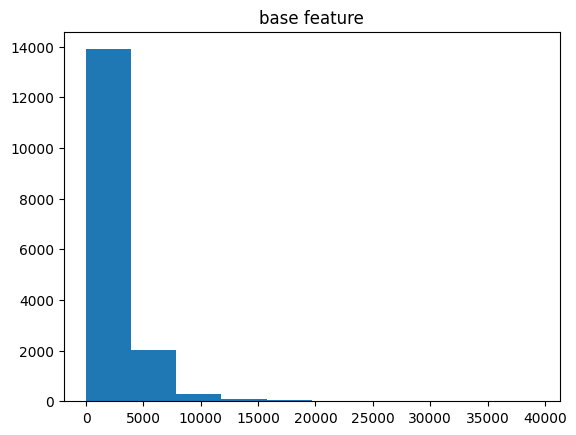

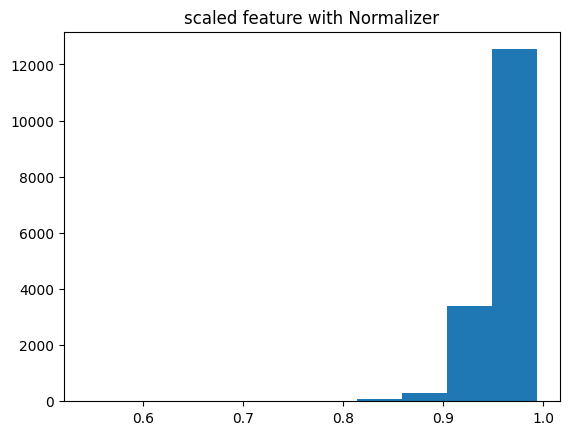

In [112]:
normalizer = Normalizer().fit(X_train_rooms)

X_train_rooms_normalized = normalizer.transform(X_train_rooms)
print(
	X_train_rooms,
	X_train_rooms_normalized,
	sep='\n\n'
)

plt.title('base feature')
plt.hist(X_train_rooms[:, 0])
plt.figure()
plt.title('scaled feature with Normalizer')
plt.hist(X_train_rooms_normalized[:, 0])
plt.show()


#### 3. MinMaxScaler

[[ 524.   93.   93.]
 [2498.  472.  487.]
 [1412.  350.  332.]
 ...
 [2352.  556.  481.]
 [1659.  466.  447.]
 [2987.  578.  585.]]

[[0.01327636 0.01427685 0.01512909]
 [0.06348237 0.07309125 0.07992107]
 [0.03586144 0.05415891 0.05443184]
 ...
 [0.05976906 0.08612663 0.07893439]
 [0.04214355 0.07216015 0.0733432 ]
 [0.07591943 0.08954066 0.09603684]]


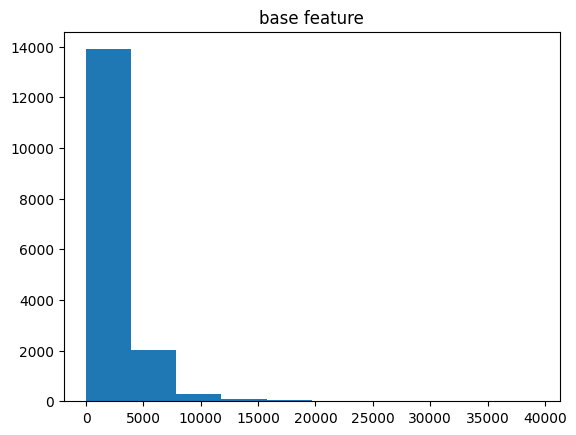

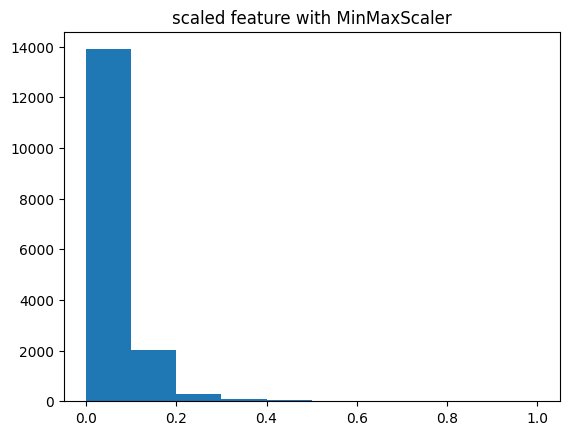

In [113]:
minmaxscaler = MinMaxScaler().fit(X_train_rooms)

X_train_rooms_mmscaled = minmaxscaler.transform(X_train_rooms)
print(
	X_train_rooms,
	X_train_rooms_mmscaled,
	sep='\n\n'
)

plt.title('base feature')
plt.hist(X_train_rooms[:, 0])
plt.figure()
plt.title('scaled feature with MinMaxScaler')
plt.hist(X_train_rooms_mmscaled[:, 0])
plt.show()


In [114]:
# now testing the error with the StandardScaler features
# preprocess the X_test
X_test_rooms_scaled = scaler.transform(X_test_rooms)

forest_scaled = RandomForestRegressor(n_estimators=50, max_depth=5)
forest_scaled.fit(X_train_rooms_scaled, y_train)

forest_scaled_preds = forest_scaled.predict(X_test_rooms_scaled)

mean_absolute_error(forest_scaled_preds, y_test)


81229.1734751081

#### Pipelines in sklearn
lets us do operations one after the other on the data more easily.

In [115]:
from sklearn.pipeline import Pipeline

standardize_pca_forest_pipeline = Pipeline(
	steps=[
		('Scaler', Normalizer()),
		('PCA', PCA(n_components=2)),
		('Forest', RandomForestRegressor(n_estimators=50, max_depth=5))
	]
)
standardize_pca_forest_pipeline


Pipeline(steps=[('Scaler', Normalizer()), ('PCA', PCA(n_components=2)),
                ('Forest',
                 RandomForestRegressor(max_depth=5, n_estimators=50))])

In [116]:
standardize_pca_forest_pipeline.fit(X_train_rooms, y_train)

pipe_preds = standardize_pca_forest_pipeline.predict(X_test_rooms)

mean_absolute_error(pipe_preds, y_test)


77965.92620854807

### 3. Categorical Encoding(dummy / one-hot)

In [117]:
ocean_proximity_dummies = pd.get_dummies(train_df['ocean_proximity'], prefix='ocean', dtype=pd.Int8Dtype())
# since there are only 3 islands, ignore them completely
ocean_proximity_dummies.drop('ocean_ISLAND', axis=1, inplace=True)
ocean_proximity_dummies


,ocean_<1H OCEAN,ocean_INLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
16341,0,1,0,0
16342,0,1,0,0
16343,0,1,0,0
16344,0,1,0,0


In [118]:
ocean_proximity_dummies_test = pd.get_dummies(test_df['ocean_proximity'], prefix='ocean', dtype=pd.Int8Dtype())
ocean_proximity_dummies_test.drop('ocean_ISLAND', axis=1, inplace=True)
ocean_proximity_dummies_test


,ocean_<1H OCEAN,ocean_INLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
19214,1,0,0,0
3909,1,0,0,0
15331,1,0,0,0
6833,1,0,0,0
4947,1,0,0,0
...,...,...,...,...
6242,1,0,0,0
9799,0,0,0,1
11301,1,0,0,0
9348,0,0,1,0


In [119]:
train_df.drop('ocean_proximity', axis=1, inplace=True)
train_df = pd.concat([train_df, ocean_proximity_dummies], axis=1)
train_df


/tmp/ipykernel_6107/831730648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop('ocean_proximity', axis=1, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_<1H OCEAN,ocean_INLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-119.89,36.73,43.0,524.0,93.0,302.0,93.0,2.6146,81300.0,0,1,0,0
1,-117.25,34.13,37.0,2498.0,472.0,1291.0,487.0,3.0000,83400.0,0,1,0,0
2,-117.10,32.68,49.0,1412.0,350.0,1200.0,332.0,2.0398,93600.0,0,0,0,1
3,-121.96,37.34,36.0,844.0,153.0,373.0,160.0,5.7910,254100.0,1,0,0,0
4,-121.24,36.34,33.0,1691.0,308.0,792.0,262.0,2.6648,164600.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-121.42,38.54,29.0,2358.0,493.0,1071.0,470.0,2.9250,94300.0,0,1,0,0
16342,-117.73,34.05,36.0,975.0,243.0,809.0,233.0,2.8929,118100.0,0,1,0,0
16343,-116.31,34.13,20.0,2352.0,556.0,1217.0,481.0,1.6063,55400.0,0,1,0,0
16344,-119.80,36.75,41.0,1659.0,466.0,1391.0,447.0,1.3527,61200.0,0,1,0,0


In [120]:
test_df.drop('ocean_proximity', axis=1, inplace=True)
test_df = pd.concat([test_df, ocean_proximity_dummies_test], axis=1)
test_df


/tmp/ipykernel_6107/28603862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop('ocean_proximity', axis=1, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_<1H OCEAN,ocean_INLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
19214,-122.70,38.45,26.0,2011.0,557.0,855.0,530.0,1.1250,233300.0,1,0,0,0
3909,-118.52,34.20,37.0,1795.0,346.0,1082.0,354.0,4.9102,207200.0,1,0,0,0
15331,-117.31,33.24,6.0,1580.0,288.0,792.0,265.0,4.0469,162400.0,1,0,0,0
6833,-118.12,34.08,49.0,1782.0,374.0,1010.0,367.0,3.1583,268200.0,1,0,0,0
4947,-118.29,34.02,26.0,2001.0,582.0,2044.0,557.0,1.1563,118800.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6242,-117.98,34.06,36.0,2391.0,407.0,1967.0,398.0,4.0274,160700.0,1,0,0,0
9799,-121.92,36.54,33.0,5323.0,887.0,1670.0,740.0,3.9792,468000.0,0,0,0,1
11301,-117.91,33.78,26.0,4297.0,1037.0,3596.0,967.0,3.0450,184000.0,1,0,0,0
9348,-122.56,37.98,36.0,2649.0,542.0,1111.0,557.0,4.8056,345700.0,0,0,1,0
